<a href="https://colab.research.google.com/github/Stephie4015/regression/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Use the path to your file in Google Drive
data = pd.read_csv('/content/drive/MyDrive/data/linear.csv')

In [ ]:
data.head()

,Speed,Accident_frequency
0,30,1
1,40,1
2,50,2
3,60,2
4,70,3


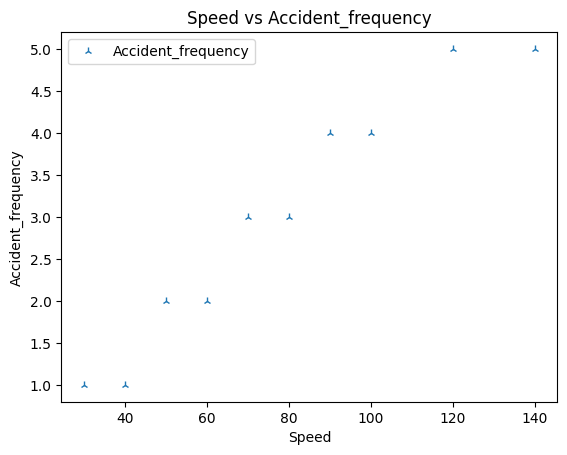

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/MyDrive/data/linear.csv')
data.plot(x='Speed', y='Accident_frequency', style='2')
plt.title('Speed vs Accident_frequency')
plt.xlabel('Speed')
plt.ylabel('Accident_frequency')
plt.show()

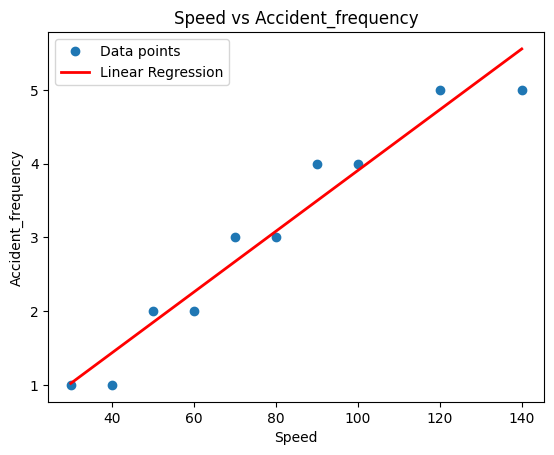

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data=pd.read_csv('/content/drive/MyDrive/data/linear.csv')
X = data[['Speed']]
y = data['Accident_frequency']
model = LinearRegression()
model.fit(X, y)
data.plot(x='Speed', y='Accident_frequency', style='o', label='Data points')
plt.plot(X, model.predict(X), color='red',linewidth=2, label='Linear Regression')
plt.title('Speed vs Accident_frequency')
plt.xlabel('Speed')
plt.ylabel('Accident_frequency')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
data=pd.read_csv('/content/drive/MyDrive/data/linear.csv')
x = pd.DataFrame(data['Speed'])
y = pd.DataFrame(data['Accident_frequency'])
model = LinearRegression()
model.fit(x, y)
print('Intercept:', model.intercept_)


Intercept: [-0.21505376]


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/data/linear.csv')
x = pd.DataFrame(data['Speed'])
y = pd.DataFrame(data['Accident_frequency'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data=pd.read_csv('/content/drive/MyDrive/data/linear.csv')
x = pd.DataFrame(data['Speed'])
y = pd.DataFrame(data['Accident_frequency'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 1)
(2, 1)
(8, 1)
(2, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(model.intercept_)

[-0.63209393]


In [ ]:
print(model.coef_)

[[0.04755382]]


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[1.74559687],
       [6.02544031]])

In [ ]:
#y_test
#print(y_test)
y_test.head(10)

,Accident_frequency
2,2
9,5


In [ ]:
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 0.6399217221135036
Mean Squared Error: 0.5581243944378288
Root Mean Squared Error: 0.7470772345867788


In [ ]:
import joblib
import pickle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
joblib.dump(model, 'linear_regression_model.pkl')
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import joblib
import numpy as np
import pandas as pd
new_x = np.array([4,5,6,7,8]).reshape(-1, 1)
model = joblib.load('linear_regression_model.pkl')
predictions = model.predict(new_x)
new_data = pd.DataFrame({'Speed': new_x.flatten(), 'Accident_frequency': predictions.flatten()})
print(new_data)


   Speed  Accident_frequency
0      4           -0.441879
1      5           -0.394325
2      6           -0.346771
3      7           -0.299217
4      8           -0.251663


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
